In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
import cv2

#### imdb-wiki is a popular dataset useful for age and geneder reccognition
#### it is in my local machine , download the shorted version from here
##### "http://datax.kennesaw.edu/imdb_wiki/"

In [10]:
df = pd.read_csv("./dataset/imdb-wiki/wiki5.csv") 

In [11]:
df.head()

,Unnamed: 0,gender,age,px0,px1,px2,px3,px4,px5,px6,...,px9990,px9991,px9992,px9993,px9994,px9995,px9996,px9997,px9998,px9999
0,0,1,36,174,173,172,173,174,171,169,...,35,30,29,28,30,32,38,32,31,29
1,1,1,41,225,189,163,177,177,137,162,...,17,8,38,39,35,9,14,49,48,25
2,2,1,30,81,67,88,36,67,105,63,...,137,130,131,135,138,137,132,128,127,128
3,3,1,24,193,194,194,194,190,189,189,...,216,216,218,218,218,217,217,217,219,219
4,4,1,33,41,35,28,26,22,21,17,...,122,112,114,114,110,117,120,126,127,127


In [12]:
import numpy as np

In [232]:
# extract the gender and age and image from the data frame
x = np.array(df)[:, 3:]
y_gender = np.array(df)[:, 1] # 1- male , 0 - female
y_age = np.array(df)[:, 2]


In [233]:
x.shape


(3209, 10000)

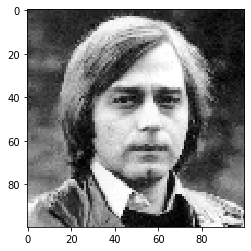

In [15]:
plt.imshow(x[2344].reshape(100, 100), cmap ="gray");

In [16]:
y_gender[2344]

1

In [210]:
img = plt.imread("./imagedata/alia.jpg")

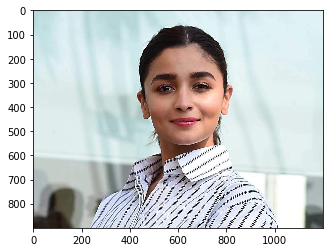

In [211]:
plt.imshow(img);

In [212]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [213]:
# cascade classifiers
face_cascade = cv2.CascadeClassifier("dataset/haarcascades/haarcascade_frontalface_alt.xml")
face = face_cascade.detectMultiScale(img, 1.3, 5)

In [214]:
# detect the face 
for (x, y, w, h) in faces:
    img = img[y - 10:y + h + 10, x - 10:x + w + 10]
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

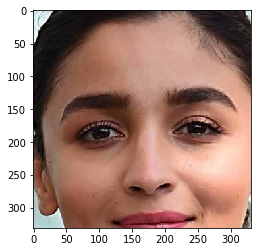

In [215]:
plt.imshow(img);

In [216]:
from skimage import color

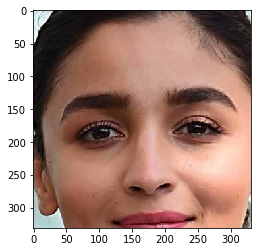

In [217]:
plt.imshow(img);

In [219]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [220]:
img.shape

(331, 331)

In [221]:
from skimage.transform import rescale

In [222]:
scale_percent = 30.2114804 # percent of original size
width = int(img.shape[1] * scale_percent / 100.0)
height = int(img.shape[0] * scale_percent / 100.0)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

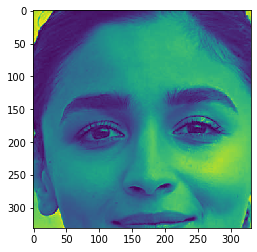

In [223]:
plt.imshow(img);

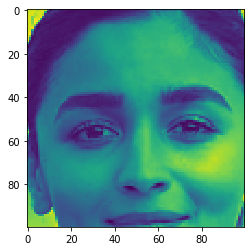

In [225]:
plt.imshow(resized)

In [226]:
test = resized.flatten()

In [227]:
y_gender.shape

(3209,)

In [234]:
x.shape

(3209, 10000)

In [228]:
import mellow.ml as ml

In [237]:
ml.knn(x, y_gender, test)

1

In [238]:
np.save("wiki_face.npy", x)

In [239]:
np.save("wiki_gender.npy", y_gender)

In [ ]:
np.save("wiki_age.npy")